In [1]:
# Libraries
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix, find
import copy

from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

import scipy.sparse.linalg as ll
import math
import scipy

In [2]:
import scipy.io as sio
import scipy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
import time
from sklearn.linear_model import LogisticRegression

# Loading the training and test data

In [3]:
X_train = pd.read_csv("X_train.csv")
X_train=X_train.drop(["Unnamed: 0"],axis=1)
X_train.head()

,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_var1,mfcc_var2,mfcc_var3,mfcc_var4,mfcc_var5,...,pitch6,pitch7,pitch8,pitch9,pitch10,pitch11,pitch12,tempo_max,tempo_sum,tempo_beat
0,-1.172941,1.293879,-0.310054,0.846111,-0.426178,0.492729,-0.549265,-0.289646,-0.810210,0.647656,...,-1.256083,-1.169622,-1.577057,-0.568767,-0.286862,0.083608,-1.244297,-0.244015,-0.343240,1.229011
1,-1.342460,0.747232,-1.274432,-0.506637,-0.896169,-0.047047,-0.396200,0.693310,0.101081,-0.256119,...,-1.207987,-1.067496,-0.643716,-1.371398,-0.182639,-1.575729,-0.892973,0.989738,1.979781,0.598433
2,0.105070,0.503199,0.257912,-0.728123,2.245165,-0.390826,-0.128915,-0.432541,0.148230,0.334559,...,0.478499,0.024089,0.559130,-0.071743,0.321799,-0.848798,-0.888076,0.141118,-0.616475,-1.333984
3,-1.448056,0.369991,0.910324,0.967401,1.459947,0.919041,-0.031016,2.893962,0.394205,0.509416,...,-0.624872,-1.261304,-1.853408,-1.356866,-0.961698,1.571062,2.441289,-2.310878,-0.955361,-0.150379
4,-0.314696,1.048519,0.437738,0.394208,1.264114,0.318176,1.074318,0.335871,0.189963,0.082640,...,-1.636303,-1.232709,-0.137213,-1.275380,-0.768173,-1.010842,-0.395513,-0.496765,0.415821,0.077520


In [4]:
X_test = pd.read_csv("X_test.csv")
X_test=X_test.drop(["Unnamed: 0"],axis=1)
X_test.head()

,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_var1,mfcc_var2,mfcc_var3,mfcc_var4,mfcc_var5,...,pitch6,pitch7,pitch8,pitch9,pitch10,pitch11,pitch12,tempo_max,tempo_sum,tempo_beat
0,0.684275,-0.810286,-0.524284,1.911102,-0.699681,-0.935206,-0.944823,-1.267007,-1.111010,-1.128340,...,1.656559,1.903750,1.349401,1.785226,0.978534,1.121784,0.898341,0.172622,0.916939,0.326138
1,-0.168469,0.184756,-0.144977,0.363165,1.205320,-0.367439,0.228760,-0.037565,0.557882,0.283903,...,0.595779,0.469830,-0.869333,-1.042008,-0.743012,0.032500,-0.825830,-1.869451,-1.065681,-1.579928
2,1.070376,-0.996549,0.778115,-0.754331,1.266227,-0.290514,0.202085,-0.038801,-0.150743,-0.209427,...,-0.173511,0.629004,-0.597585,0.508204,0.633026,-0.165569,0.309499,0.430009,-0.605368,-0.899190
3,-0.386572,-0.011905,2.438363,-1.448555,0.384486,1.846998,3.216494,0.917217,0.579637,0.529653,...,0.352439,1.562375,0.249539,0.716354,-0.522864,-0.538336,-0.680197,-0.757958,-0.298218,-1.579928
4,-1.517943,1.386123,0.571646,-0.781112,0.315218,1.144519,-0.150606,1.213199,0.805218,1.345694,...,-1.684873,-0.876754,-2.210057,-1.387878,-0.557826,-1.463390,-0.487584,-1.159549,0.505381,0.598433


In [5]:
y_train = pd.read_csv("y_train.csv")
y_train =y_train.drop(["Unnamed: 0"],axis=1)
y_train.head()

,label
0,6.0
1,4.0
2,9.0
3,1.0
4,1.0


In [6]:
y_test = pd.read_csv("y_test.csv")
y_test =y_test.drop(["Unnamed: 0"],axis=1)
y_test.head()

,label
0,7.0
1,5.0
2,8.0
3,5.0
4,3.0


# Pycaret implementation just to check out various algos

In [7]:
from pycaret.classification import *

In [8]:
train_data = X_train.copy()

In [9]:
train_data['y'] = y_train["label"]

In [10]:
#s = setup(train_data, target = 'y')

In [11]:
#best_model = compare_models(sort='Accuracy')

# Implementing KNN Classifier model (from Paper)


In [12]:
#KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
#Cross validation score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=10).mean()

0.567863754165124

In [14]:
#Grid Search hyper parameter tuning
#Tuning the knn model
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
params = [{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,15,17,20,25,50], 'metric': ['minkowski','mahalanobis','manhattan']}]

clf_knn = GridSearchCV(model, params, cv = 10, scoring='accuracy')

clf_knn.fit(X_train, y_train)
print(clf_knn.best_params_)
k=clf_knn.best_params_['n_neighbors']

{'metric': 'manhattan', 'n_neighbors': 10}


In [15]:
#display mean accuracy
import pandas as pd
print(clf_knn.best_params_)
#df = pd.DataFrame(clf_ksvm.cv_results_[params])
result_knn=pd.concat([pd.DataFrame(clf_knn.cv_results_["params"]),pd.DataFrame(clf_knn.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
result_knn

{'metric': 'manhattan', 'n_neighbors': 10}


,metric,n_neighbors,Accuracy
0,minkowski,1,0.601796
1,minkowski,2,0.552980
2,minkowski,3,0.567864
3,minkowski,4,0.586875
4,minkowski,5,0.589522
5,minkowski,6,0.592207
6,minkowski,7,0.588171
7,minkowski,8,0.605813
8,minkowski,9,0.585450
9,minkowski,10,0.589467


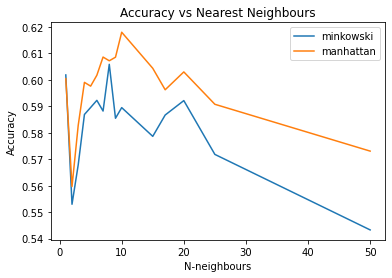

In [127]:
plt.plot(result_knn.loc[0:14,"n_neighbors"],result_knn.loc[0:14,"Accuracy"])
plt.plot(result_knn.loc[0:14,"n_neighbors"],result_knn.loc[30:44,"Accuracy"])

plt.xlabel("N-neighbours")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Nearest Neighbours')
plt.legend(['minkowski', 'manhattan'])
plt.show()

[[14  0  3  3  1  2  3  0  1  1]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  0 15  3  1  8  0  0  2  0]
 [ 0  0  0 24  2  1  0  3  0  0]
 [ 2  0  0  3 14  0  0  2  4  1]
 [ 0  1  0  0  0 26  0  2  1  0]
 [ 4  0  1  2  0  0 18  0  0  2]
 [ 0  0  1  3  1  0  0 11  0  0]
 [ 0  0  3  1  3  1  0  2 14  1]
 [ 1  0  3  5  0  1  1  2  4  4]]
              precision    recall  f1-score   support

         1.0       0.67      0.50      0.57        28
         2.0       0.94      1.00      0.97        15
         3.0       0.58      0.52      0.55        29
         4.0       0.55      0.80      0.65        30
         5.0       0.64      0.54      0.58        26
         6.0       0.67      0.87      0.75        30
         7.0       0.82      0.67      0.73        27
         8.0       0.50      0.69      0.58        16
         9.0       0.54      0.56      0.55        25
        10.0       0.44      0.19      0.27        21

    accuracy                           0.63       247
   macro avg       

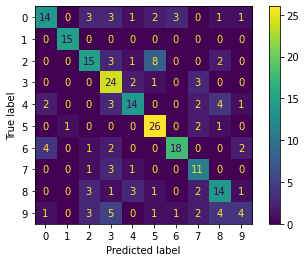

In [134]:
# Confusion matrix on test data
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
clf_knn1 = KNeighborsClassifier(n_neighbors=10,metric='manhattan')
clf_knn1.fit(X_train, y_train)
score=clf_knn1.score(X_test, y_test)
predictions = clf_knn1.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
#plot_confusion_matrix(clf_knn1, X_test, y_test, labels= ["Blue","classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae","rock"])  
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

In [17]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
Xi_train = pca.transform(X_train)
Xi_test = pca.transform(X_test)

In [18]:
clf_t = KNeighborsClassifier(n_neighbors=10,metric='manhattan')
clf_t.fit(Xi_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

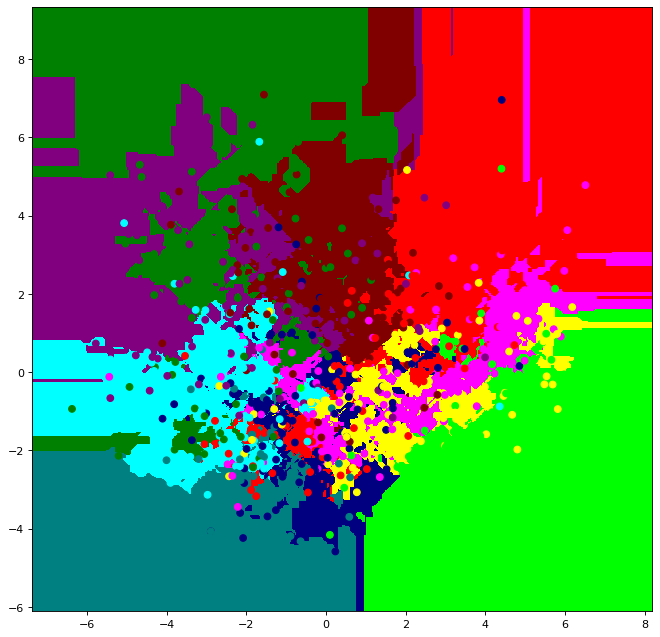

In [19]:
# Reference code from : https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FF0000', '#00FF00','#FF00FF','#00FFFF','#008000','#FFFF00','#008080','#800080','#800000','#000080'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#FF00FF','#00FFFF','#008000','#FFFF00','#008080','#800080','#800000','#000080'])



# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xi_train[:, 0].min() - 1, Xi_train[:, 0].max() + 1
y_min, y_max = Xi_train[:, 1].min() - 1, Xi_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_t.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xi_train[:, 0], Xi_train[:, 1], c=y_train.to_numpy().flatten(), cmap=cmap_bold)
#plt.scatter(Xi_test[:, 0], Xi_test[:, 1], c=ytest, marker='x',cmap= cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors))

plt.show()

# SVM - Linear

In [20]:
#Tuning the SVM model
model = SVC(kernel='linear')
params = [{'C': [0.001,0.01,0.025,0.08,0.01,0.1,1,2,5,10]}]

clf_svm = GridSearchCV(model, params, cv = 10, scoring='accuracy')

clf_svm.fit(X_train, y_train)
print(clf_svm.best_params_)
k=clf_svm.best_params_['C']

{'C': 0.1}


In [21]:
#display mean accuracy
import pandas as pd
print(clf_svm.best_params_)
#df = pd.DataFrame(clf_ksvm.cv_results_[params])
pd.concat([pd.DataFrame(clf_svm.cv_results_["params"]),pd.DataFrame(clf_svm.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

{'C': 0.1}


,C,Accuracy
0,0.001,0.407867
1,0.010,0.601573
2,0.025,0.625935
3,0.080,0.631414
4,0.010,0.601573
5,0.100,0.632729
6,1.000,0.631433
7,2.000,0.624750
8,5.000,0.619252
9,10.000,0.616568


In [22]:
#SVM Kernel
clf_svm1 = SVC(kernel="linear", C=0.1)
clf_svm1.fit(X_train, y_train)
score=clf_svm1.score(X_test, y_test)
predictions = clf_svm1.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[14  0  3  1  1  1  5  0  0  3]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 3  0 17  3  0  1  0  1  2  2]
 [ 0  0  0 17  5  0  0  6  1  1]
 [ 2  0  0  0 19  0  0  3  1  1]
 [ 0  1  1  0  0 24  0  1  1  2]
 [ 4  0  1  1  1  0 20  0  0  0]
 [ 0  0  1  2  0  0  0 11  1  1]
 [ 1  0  2  1  2  0  0  2 16  1]
 [ 2  0  4  2  1  0  1  2  1  8]]
              precision    recall  f1-score   support

         1.0       0.54      0.50      0.52        28
         2.0       0.94      1.00      0.97        15
         3.0       0.59      0.59      0.59        29
         4.0       0.63      0.57      0.60        30
         5.0       0.66      0.73      0.69        26
         6.0       0.92      0.80      0.86        30
         7.0       0.77      0.74      0.75        27
         8.0       0.42      0.69      0.52        16
         9.0       0.70      0.64      0.67        25
        10.0       0.42      0.38      0.40        21

    accuracy                           0.65       247
   macro avg       

# SVM - Kernel

In [180]:
#Tuning the SVM model  0.0001,0.001,0.01,0.1,1,5,
model = SVC(degree=5, gamma=0.01)
params = [{'kernel':['poly', 'rbf'],'C': [0.0001,0.001,0.01,0.1,1,5,10,50,100,500]}]

clf_svm = GridSearchCV(model, params, cv = 10, scoring='accuracy')

clf_svm.fit(X_train, y_train)  

print(clf_svm.best_params_)
k=clf_svm.best_params_['C']

{'C': 10, 'kernel': 'rbf'}


In [181]:
#display mean accuracy
import pandas as pd
print(clf_svm.best_params_)
#df = pd.DataFrame(clf_ksvm.cv_results_[params])
result_svm=pd.concat([pd.DataFrame(clf_svm.cv_results_["params"]),pd.DataFrame(clf_svm.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
result_svm = result_svm.sort_values(by=['kernel','C']).reset_index(drop=True)
result_svm

{'C': 10, 'kernel': 'rbf'}


,C,kernel,Accuracy
0,0.0001,poly,0.112458
1,0.0010,poly,0.112458
2,0.0100,poly,0.112458
3,0.1000,poly,0.112458
4,1.0000,poly,0.125972
5,5.0000,poly,0.165254
6,10.0000,poly,0.191114
7,50.0000,poly,0.296853
8,100.0000,poly,0.345613
9,500.0000,poly,0.429711


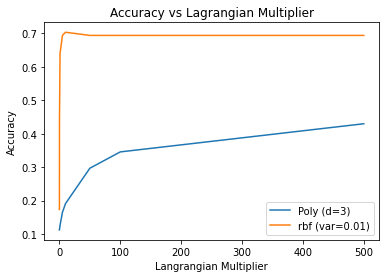

In [190]:
plt.plot(result_svm.loc[0:9,"C"], result_svm.loc[0:9,"Accuracy"])
plt.plot(result_svm.loc[0:9,"C"],result_svm.loc[10:19,"Accuracy"])

plt.xlabel("Langrangian Multiplier")
plt.ylabel("Accuracy")
plt.title('Accuracy vs Lagrangian Multiplier')
plt.legend(['Poly (d=3)', 'rbf (var=0.01)'])
plt.show()

[[19  0  0  1  0  0  4  0  0  4]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 2  0 21  2  0  1  0  1  1  1]
 [ 0  0  0 19  3  0  0  5  2  1]
 [ 0  0  0  1 17  0  1  2  3  2]
 [ 1  1  0  0  0 27  0  0  0  1]
 [ 3  0  2  1  0  0 21  0  0  0]
 [ 0  0  1  2  0  0  0 11  1  1]
 [ 1  0  2  0  2  0  0  2 17  1]
 [ 2  0  2  4  0  1  1  3  0  8]]
              precision    recall  f1-score   support

         1.0       0.68      0.68      0.68        28
         2.0       0.94      1.00      0.97        15
         3.0       0.75      0.72      0.74        29
         4.0       0.63      0.63      0.63        30
         5.0       0.77      0.65      0.71        26
         6.0       0.93      0.90      0.92        30
         7.0       0.78      0.78      0.78        27
         8.0       0.46      0.69      0.55        16
         9.0       0.71      0.68      0.69        25
        10.0       0.42      0.38      0.40        21

    accuracy                           0.71       247
   macro avg       

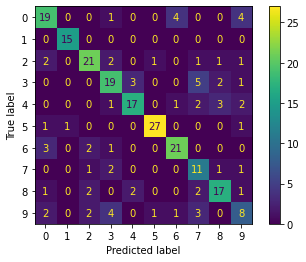

In [191]:
#SVM Kernel
clf_svm1 = SVC(kernel="rbf", C=10,gamma=0.01)
clf_svm1.fit(X_train, y_train)   # X_train
#score=clf_svm1.score(X_test, y_test)
predictions = clf_svm1.predict(X_test) #X_test

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

In [26]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
Xi_train = pca.transform(X_train)
Xi_test = pca.transform(X_test)

In [27]:
clf_t = SVC(kernel="rbf", C=10,gamma=0.01)
clf_t.fit(Xi_train, y_train)

SVC(C=10, gamma=0.01)

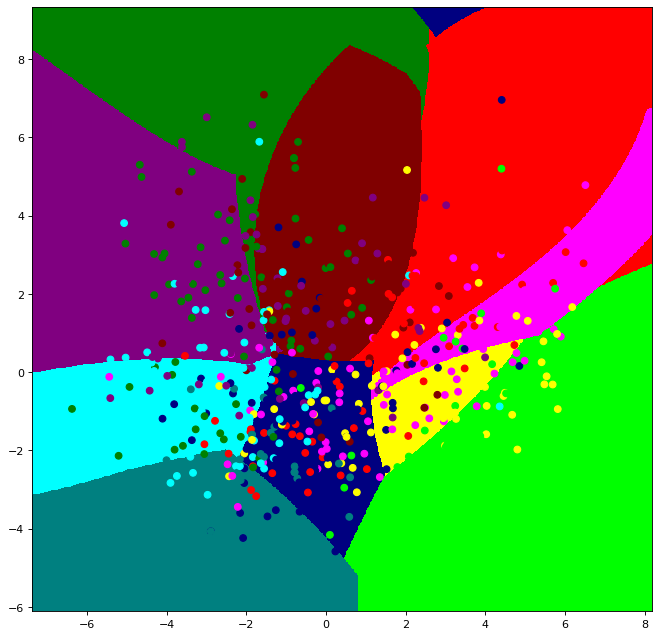

In [28]:
# Reference code from : https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FF0000', '#00FF00','#FF00FF','#00FFFF','#008000','#FFFF00','#008080','#800080','#800000','#000080'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#FF00FF','#00FFFF','#008000','#FFFF00','#008080','#800080','#800000','#000080'])



# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xi_train[:, 0].min() - 1, Xi_train[:, 0].max() + 1
y_min, y_max = Xi_train[:, 1].min() - 1, Xi_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_t.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xi_train[:, 0], Xi_train[:, 1], c=y_train.to_numpy().flatten(), cmap=cmap_bold)
#plt.scatter(Xi_test[:, 0], Xi_test[:, 1], c=ytest, marker='x',cmap= cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors))

plt.show()

# Bagging: CART and Random Forest

In [193]:
#CART train model
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [194]:
# CART accuracy
ypred = clf.predict(X_test)
error_cart = sum((ypred==y_test.to_numpy().flatten()))/y_test.size
error_cart

0.47368421052631576

In [195]:
clf.get_depth()

16

In [196]:
#Training error
cv_acc=cross_val_score(clf, X_train, y_train, cv=10).mean()
cv_acc


ypred = clf.predict(X_train)
error_cart = sum((ypred==y_train.to_numpy().flatten()))/y_train.size
error_cart

0.9986449864498645

In [197]:
#Tuning the decision tree model
model = tree.DecisionTreeClassifier()
params = [{'ccp_alpha': [0,0.00051,0.00052,0.00053,0.00054],'max_depth':[5,8,9]}]

clf = GridSearchCV(model, params, cv = 10, scoring='accuracy')

clf.fit(X_train, y_train)  

print(clf.best_params_)

{'ccp_alpha': 0.00053, 'max_depth': 8}


In [198]:
#display mean accuracy
import pandas as pd
print(clf.best_params_)
#df = pd.DataFrame(clf_ksvm.cv_results_[params])
results_cart=pd.concat([pd.DataFrame(clf.cv_results_["params"]),pd.DataFrame(clf.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

{'ccp_alpha': 0.00053, 'max_depth': 8}


In [229]:
results_cart

,ccp_alpha,max_depth,Accuracy
0,0.00000,5,0.433673
1,0.00000,8,0.448445
2,0.00000,9,0.439023
3,0.00051,5,0.433673
4,0.00051,8,0.448482
5,0.00051,9,0.448575
6,0.00052,5,0.432321
7,0.00052,8,0.447168
8,0.00052,9,0.455294
9,0.00053,5,0.435006


<AxesSubplot:xlabel='ccp_alpha', ylabel='Accuracy'>

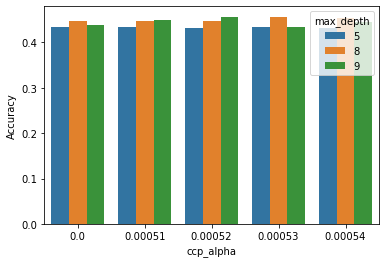

In [201]:
import seaborn as sns
sns.barplot(x="ccp_alpha", y="Accuracy", hue="max_depth", data=results_cart)

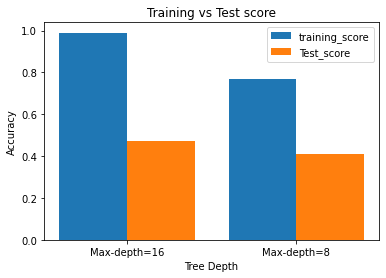

In [215]:
X = ['Max-depth=16','Max-depth=8']
CV_score = [0.99,0.77]
Test_score = [0.47,0.41]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, CV_score, 0.4, label = 'training_score')
plt.bar(X_axis + 0.2, Test_score, 0.4, label = 'Test_score')


plt.xticks(X_axis, X)
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Training vs Test score")
plt.legend()
plt.show()

#plt.xlabel("")
#plt.ylabel("Accuracy")
#plt.title('Accuracy vs Lagrangian Multiplier')
#plt.legend(['Poly (d=3)', 'rbf (var=0.01)'])

In [226]:
clf = tree.DecisionTreeClassifier(ccp_alpha= 0.00054, max_depth= 8)
clf.fit(X_train, y_train)

# CART accuracy
ypred = clf.predict(X_test)
error_cart = sum((ypred==y_test.to_numpy().flatten()))/y_test.size
error_cart

0.44534412955465585

In [110]:
#CART training score
ypred = clf.predict(X_train)
error_train = sum((ypred==y_train.to_numpy().flatten()))/y_train.size
error_train

0.7710027100271003

### Using Bagging - Random Forest

In [111]:
n_of_trees = []
error_rf = []
oob_s = []
for i in range(50):
    n_of_trees +=[i]
    clf_rf = RandomForestClassifier(n_estimators=i+1, criterion= 'entropy',random_state=2,oob_score=True)
    clf_rf.fit(X_train, y_train)
    ypred=clf_rf.predict(X_test)
    error = sum((ypred==y_test.to_numpy().flatten()))/y_test.size
    error_rf +=[error]
    oob_s +=[clf_rf.oob_score_]
    

In [112]:
len(n_of_trees)

50

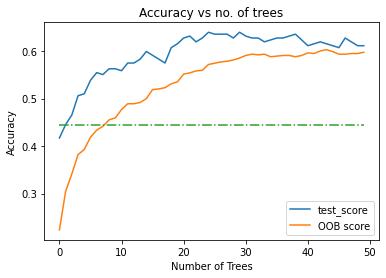

In [227]:
plt.plot(n_of_trees,error_rf)
plt.plot(n_of_trees,oob_s)
plt.plot(n_of_trees,[error_cart]*50, '-.')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title('Accuracy vs no. of trees')
plt.legend(['test_score', 'OOB score'])
plt.show()

In [115]:
max(error_rf)  # test error

0.6396761133603239

In [116]:
idx=error_rf.index(max(error_rf))
idx

24

In [117]:
oob_s[idx] # cross validation error

0.5718157181571816

[[12  0  3  2  0  0 10  0  1  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 1  0 17  2  0  3  0  0  2  4]
 [ 0  0  0 18  2  0  0  7  3  0]
 [ 1  0  0  0 13  1  2  3  4  2]
 [ 2  0  0  0  0 25  0  1  0  2]
 [ 1  0  0  5  0  0 19  0  0  2]
 [ 0  0  0  2  0  0  0 12  1  1]
 [ 1  0  1  0  4  0  0  0 18  1]
 [ 1  0  3  5  0  0  1  1  4  6]]
              precision    recall  f1-score   support

         1.0       0.63      0.43      0.51        28
         2.0       1.00      1.00      1.00        15
         3.0       0.71      0.59      0.64        29
         4.0       0.53      0.60      0.56        30
         5.0       0.68      0.50      0.58        26
         6.0       0.86      0.83      0.85        30
         7.0       0.59      0.70      0.64        27
         8.0       0.50      0.75      0.60        16
         9.0       0.55      0.72      0.62        25
        10.0       0.33      0.29      0.31        21

    accuracy                           0.63       247
   macro avg       

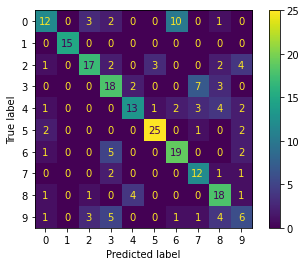

In [210]:
#Random forest
clf_rf =  RandomForestClassifier(n_estimators=24, criterion= 'entropy',random_state=2,oob_score=True)
clf_rf.fit(X_train, y_train)
score=clf_rf.score(X_test, y_test)
predictions = clf_rf.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

In [39]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
Xi_train = pca.transform(X_train)
Xi_test = pca.transform(X_test)

In [40]:
clf_t = RandomForestClassifier(n_estimators=24, criterion= 'entropy',random_state=2,oob_score=True)
clf_t.fit(Xi_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=24, oob_score=True,
                       random_state=2)

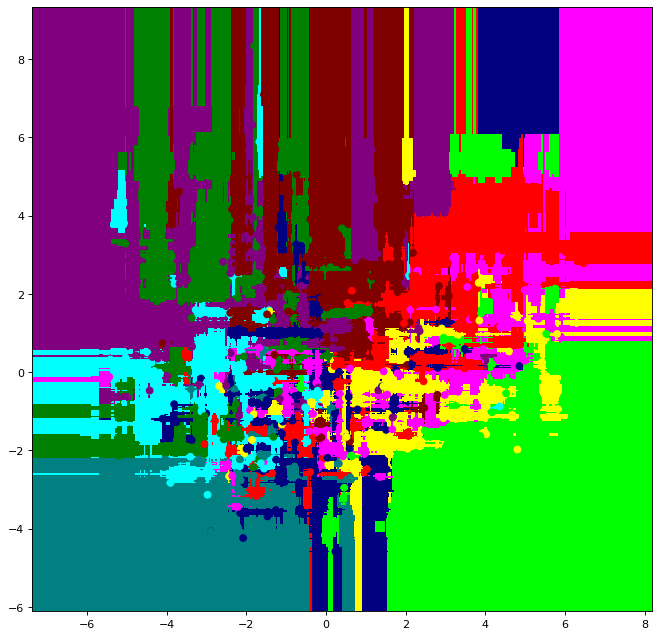

In [41]:
# Reference code from : https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FF0000', '#00FF00','#FF00FF','#00FFFF','#008000','#FFFF00','#008080','#800080','#800000','#000080'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#FF00FF','#00FFFF','#008000','#FFFF00','#008080','#800080','#800000','#000080'])



# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xi_train[:, 0].min() - 1, Xi_train[:, 0].max() + 1
y_min, y_max = Xi_train[:, 1].min() - 1, Xi_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_t.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xi_train[:, 0], Xi_train[:, 1], c=y_train.to_numpy().flatten(), cmap=cmap_bold)
#plt.scatter(Xi_test[:, 0], Xi_test[:, 1], c=ytest, marker='x',cmap= cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors))

plt.show()

# Boosting

In [213]:
# WE plan to boost the CART that we had trained earlier

from sklearn.ensemble import AdaBoostClassifier
clf = tree.DecisionTreeClassifier(ccp_alpha= 0.00054, max_depth= 8)
clf_boost = AdaBoostClassifier(clf,n_estimators=50)
clf_boost.fit(X_train, y_train)
ypred=clf_boost.predict(X_test)
error = sum((ypred==y_test.to_numpy().flatten()))/y_test.size

error

0.5708502024291497

In [219]:
n_of_iteration = []
Accuracy_cv = []
Acc_test = []
for i in range(50):
    n_of_iteration +=[i]
    clf_boost = AdaBoostClassifier(clf,n_estimators=i+1)
    clf_boost.fit(X_train, y_train)
    cv_acc=cross_val_score(clf_boost, X_train, y_train, cv=5).mean()
    Accuracy_cv +=[cv_acc]
    
    ypred=clf_boost.predict(X_test)
    error = sum((ypred==y_test.to_numpy().flatten()))/y_test.size
    Acc_test +=[error]
    print(i)
   

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


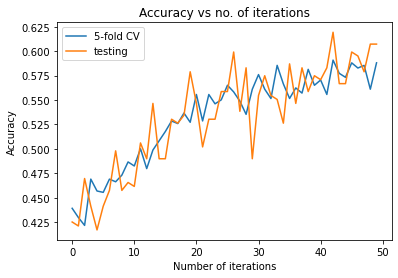

In [220]:
#plot the two accuracies
plt.plot(n_of_iteration[0:76],Accuracy_cv)
plt.plot(n_of_iteration[0:76],Acc_test)
#plt.plot(n_of_trees,[error_cart]*76, '-.')
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.title('Accuracy vs no. of iterations')
plt.legend(['5-fold CV', 'testing'])
plt.show()

[[ 9  0  3  2  0  0  2  0  2 10]
 [ 0 13  1  0  0  1  0  0  0  0]
 [ 2  0 16  2  0  0  0  0  3  6]
 [ 0  0  0 21  1  0  0  4  2  2]
 [ 2  0  2  2 10  0  1  1  5  3]
 [ 2  1  1  0  0 15  0  2  0  9]
 [ 0  0  2  0  0  0 19  0  0  6]
 [ 0  0  0  2  0  0  0 14  0  0]
 [ 1  0  2  1  2  0  0  1 17  1]
 [ 2  0  1  2  0  0  1  3  0 12]]
              precision    recall  f1-score   support

         1.0       0.50      0.32      0.39        28
         2.0       0.93      0.87      0.90        15
         3.0       0.57      0.55      0.56        29
         4.0       0.66      0.70      0.68        30
         5.0       0.77      0.38      0.51        26
         6.0       0.94      0.50      0.65        30
         7.0       0.83      0.70      0.76        27
         8.0       0.56      0.88      0.68        16
         9.0       0.59      0.68      0.63        25
        10.0       0.24      0.57      0.34        21

    accuracy                           0.59       247
   macro avg       

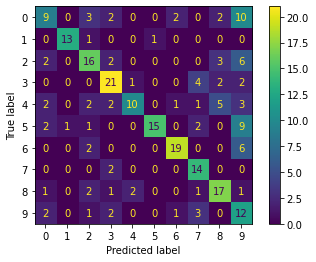

In [224]:
#Adaboost
clf_boost = AdaBoostClassifier(clf,n_estimators=40)
clf_boost.fit(X_train, y_train)

predictions = clf_boost.predict(X_test)
print(confusion_matrix(y_test.to_numpy().flatten(),predictions))
print(classification_report(y_test.to_numpy().flatten(),predictions))
ConfusionMatrixDisplay(confusion_matrix(y_test, predictions)).plot()

In [123]:
clf_t = AdaBoostClassifier(clf,n_estimators=44)
clf_t.fit(Xi_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.00054,
                                                         max_depth=8),
                   n_estimators=44)

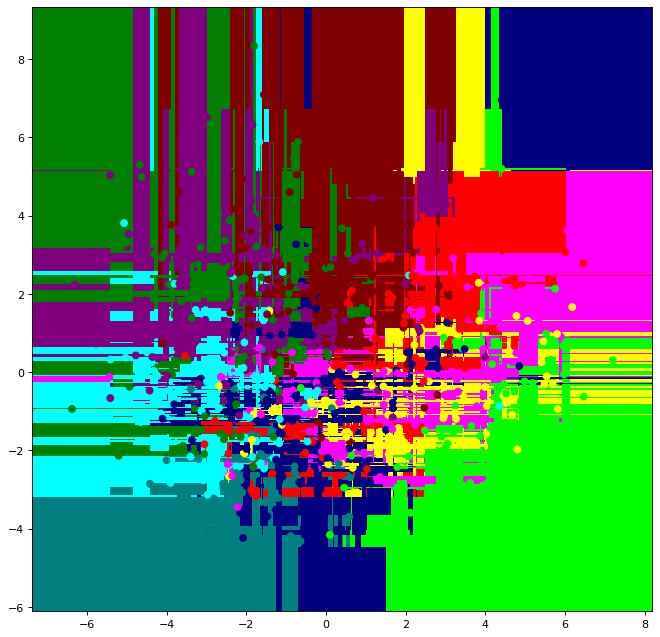

In [124]:
# Reference code from : https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
from matplotlib.colors import ListedColormap
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FF0000', '#00FF00','#FF00FF','#00FFFF','#008000','#FFFF00','#008080','#800080','#800000','#000080'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#FF00FF','#00FFFF','#008000','#FFFF00','#008080','#800080','#800000','#000080'])



# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = Xi_train[:, 0].min() - 1, Xi_train[:, 0].max() + 1
y_min, y_max = Xi_train[:, 1].min() - 1, Xi_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf_t.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(Xi_train[:, 0], Xi_train[:, 1], c=y_train.to_numpy().flatten(), cmap=cmap_bold)
#plt.scatter(Xi_test[:, 0], Xi_test[:, 1], c=ytest, marker='x',cmap= cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors))

plt.show()

In [48]:
# WE plan to boost the Random forest model that we had trained earlier

from sklearn.ensemble import AdaBoostClassifier

n_of_iteration = []
Accuracy_cv = []
Acc_test = []

for i in range(30):
    n_of_iteration +=[i]
    clf_boost = AdaBoostClassifier(clf_rf,n_estimators=i+1)
    clf_boost.fit(X_train, y_train)
    ypred=clf_boost.predict(X_test)
    error = sum((ypred==y_test.to_numpy().flatten()))/y_test.size
    Acc_test +=[error]
    cv_acc=cross_val_score(clf_boost, X_train, y_train, cv=5).mean()
    Accuracy_cv +=[cv_acc]
    print(error, "  ",cv_acc)
    

0.5870445344129555    0.6017006802721088
0.6356275303643725    0.5881044309615737
0.6518218623481782    0.6151774223202795
0.631578947368421    0.6017282588711159
0.6518218623481782    0.5949623092480236
0.631578947368421    0.6179812465526752
0.6437246963562753    0.6179720536863395
0.6234817813765182    0.6193417907703622
0.6437246963562753    0.6057639271924986
0.631578947368421    0.6179628608200037
0.6518218623481782    0.6261537047251332
0.631578947368421    0.6085034013605443
0.6275303643724697    0.6031347674204818
0.6194331983805668    0.6166115094686523
0.6558704453441295    0.632882882882883
0.6356275303643725    0.6247839676411104
0.6558704453441295    0.6234418091560949
0.6437246963562753    0.6099007170435742
0.6437246963562753    0.6234142305570878
0.6356275303643725    0.6437028865600294
0.659919028340081    0.6301434087148372
0.6356275303643725    0.6233866519580806
0.659919028340081    0.6152969295826438
0.6518218623481782    0.6261445118587976
0.6761133603238867    0

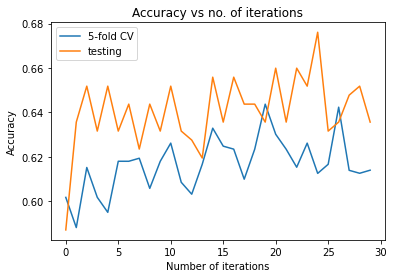

In [49]:
#plot the two accuracies (boosting the bagged model)
plt.plot(n_of_iteration[0:76],Accuracy_cv)
plt.plot(n_of_iteration[0:76],Acc_test)
#plt.plot(n_of_trees,[error_cart]*76, '-.')
plt.xlabel("Number of iterations")
plt.ylabel("Accuracy")
plt.title('Accuracy vs no. of iterations')
plt.legend(['5-fold CV', 'testing'])
plt.show()

# Logistics Regression

In [50]:
#logistics regression
clf_lr = LogisticRegression(random_state=10,solver='liblinear',penalty='l1',C=0.1)
clf_lr.fit(X_train, y_train)
predictions = clf_lr.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 8  0  4  3  0  0 11  0  1  1]
 [ 0 14  0  0  0  1  0  0  0  0]
 [ 4  0 13  2  0  1  0  4  3  2]
 [ 0  0  0 13  5  0  0 10  1  1]
 [ 1  1  0  2 14  1  2  4  0  1]
 [ 1  1  0  0  0 19  0  6  3  0]
 [ 2  0  0  0  0  1 24  0  0  0]
 [ 0  0  0  2  0  0  0 14  0  0]
 [ 1  0  0  1  4  1  0  1 16  1]
 [ 2  0  3  1  1  3  1  3  1  6]]
              precision    recall  f1-score   support

         1.0       0.42      0.29      0.34        28
         2.0       0.88      0.93      0.90        15
         3.0       0.65      0.45      0.53        29
         4.0       0.54      0.43      0.48        30
         5.0       0.58      0.54      0.56        26
         6.0       0.70      0.63      0.67        30
         7.0       0.63      0.89      0.74        27
         8.0       0.33      0.88      0.48        16
         9.0       0.64      0.64      0.64        25
        10.0       0.50      0.29      0.36        21

    accuracy                           0.57       247
   macro avg       

In [51]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LogisticRegression()).fit(X_train, y_train)
selector.get_support()
X_L1 = selector.transform(X_train)
X_test_L1 = selector.transform(X_test)

In [52]:
X_L1.shape

(738, 15)

In [53]:
#logistics regression from only selected variables
clf_lr = LogisticRegression(random_state=10)
clf_lr.fit(X_L1, y_train)
predictions = clf_lr.predict(X_test_L1)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 6  0  8  3  0  1  6  0  1  3]
 [ 0 14  0  0  0  1  0  0  0  0]
 [ 2  0 17  2  0  0  0  2  3  3]
 [ 0  0  0 19  4  0  0  6  1  0]
 [ 3  0  2  0 15  0  2  3  1  0]
 [ 2  1  0  0  0 23  0  0  1  3]
 [ 4  0  0  0  0  0 22  0  0  1]
 [ 0  0  0  2  1  0  0 13  0  0]
 [ 1  0  1  2  2  0  0  1 18  0]
 [ 3  0  3  6  0  0  1  2  0  6]]
              precision    recall  f1-score   support

         1.0       0.29      0.21      0.24        28
         2.0       0.93      0.93      0.93        15
         3.0       0.55      0.59      0.57        29
         4.0       0.56      0.63      0.59        30
         5.0       0.68      0.58      0.62        26
         6.0       0.92      0.77      0.84        30
         7.0       0.71      0.81      0.76        27
         8.0       0.48      0.81      0.60        16
         9.0       0.72      0.72      0.72        25
        10.0       0.38      0.29      0.32        21

    accuracy                           0.62       247
   macro avg       

In [54]:
from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif
f_classif(X_train, y_train)
MI = mutual_info_classif(X_train, y_train)

In [55]:
sindex = np.argsort(MI)
sindex=sindex[::-1]
MI[sindex]

array([0.46558061, 0.44882828, 0.42812447, 0.42135626, 0.39701715,
       0.37397856, 0.31763878, 0.30646376, 0.29949208, 0.2790054 ,
       0.26636575, 0.25632818, 0.24139251, 0.21495638, 0.2101306 ,
       0.2078272 , 0.20721319, 0.20304696, 0.20128671, 0.20112321,
       0.19731642, 0.18424314, 0.18198557, 0.1704498 , 0.15602579,
       0.1510453 , 0.14466613, 0.13518077, 0.13195999, 0.11674024,
       0.08639506, 0.08630126, 0.08072475, 0.07550865, 0.06013746,
       0.04893707])

In [56]:
feature_list=list(X_train.columns)
priority_list = [feature_list[i] for i in sindex]
priority_list

['centroid_var',
 'rolloff_mean',
 'rolloff_var',
 'mfcc_mean2',
 'mfcc_mean1',
 'centroid_mean',
 'tempo_sum',
 'mfcc_var5',
 'mfcc_mean4',
 'tempo_max',
 'mfcc_var4',
 'zero_cross',
 'mfcc_var3',
 'pitch2',
 'mfcc_mean3',
 'pitch7',
 'pitch9',
 'pitch10',
 'pitch11',
 'mfcc_mean5',
 'mfcc_var1',
 'pitch12',
 'pitch1',
 'pitch5',
 'pitch8',
 'tempo_beat',
 'pitch4',
 'pitch6',
 'mfcc_var2',
 'pitch3',
 'low_energy',
 'mfcc_skew3',
 'mfcc_skew1',
 'mfcc_skew4',
 'mfcc_skew5',
 'mfcc_skew2']

In [57]:
d = {'features':priority_list , 'MI': list(MI[sindex])}
feature_imp_MI=pd.DataFrame(data=d)
feature_imp_MI

,features,MI
0,centroid_var,0.465581
1,rolloff_mean,0.448828
2,rolloff_var,0.428124
3,mfcc_mean2,0.421356
4,mfcc_mean1,0.397017
5,centroid_mean,0.373979
6,tempo_sum,0.317639
7,mfcc_var5,0.306464
8,mfcc_mean4,0.299492
9,tempo_max,0.279005


In [58]:
rmindex=np.argsort(clf_rf.feature_importances_)
rmindex= rmindex[::-1]

In [59]:
feature_list=list(X_train.columns)
importance_list = [feature_list[i] for i in rmindex]
importance_list

['rolloff_mean',
 'rolloff_var',
 'mfcc_mean4',
 'mfcc_mean1',
 'mfcc_var5',
 'centroid_var',
 'centroid_mean',
 'tempo_sum',
 'mfcc_var4',
 'tempo_max',
 'zero_cross',
 'mfcc_mean2',
 'mfcc_var3',
 'mfcc_mean3',
 'mfcc_var1',
 'mfcc_mean5',
 'tempo_beat',
 'pitch12',
 'pitch2',
 'pitch7',
 'pitch5',
 'pitch1',
 'pitch11',
 'pitch10',
 'mfcc_skew3',
 'pitch6',
 'mfcc_skew5',
 'pitch9',
 'mfcc_skew4',
 'mfcc_skew2',
 'pitch4',
 'mfcc_skew1',
 'pitch3',
 'low_energy',
 'pitch8',
 'mfcc_var2']

In [60]:
clf_rf.feature_importances_[rmindex]

array([0.06132065, 0.06100216, 0.05899199, 0.05751371, 0.04895489,
       0.04798263, 0.04700185, 0.04552793, 0.04309076, 0.03578216,
       0.03549642, 0.02982792, 0.0276714 , 0.02749058, 0.02609679,
       0.02585519, 0.02322315, 0.02157839, 0.01938249, 0.01871014,
       0.01848729, 0.01825564, 0.01722227, 0.0166243 , 0.01661511,
       0.01592392, 0.01499981, 0.01483519, 0.01454278, 0.01367042,
       0.01359625, 0.01317996, 0.01277557, 0.01234923, 0.01227064,
       0.01215045])

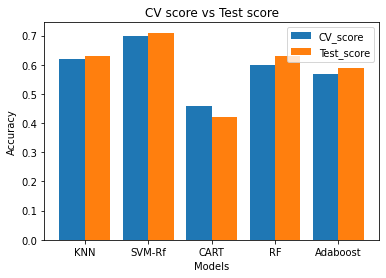

In [230]:
X = ['KNN','SVM-Rf', 'CART','RF','Adaboost']
CV_score = [0.62,0.7,0.46,0.6,0.57]
Test_score = [0.63,0.71,0.42,0.63,0.59]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, CV_score, 0.4, label = 'CV_score')
plt.bar(X_axis + 0.2, Test_score, 0.4, label = 'Test_score')


plt.xticks(X_axis, X)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("CV score vs Test score")
plt.legend()
plt.show()